In [1]:
# Load required libraries
from sklearn import tree
import sklearn.tree
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics 
import math
import random
from sklearn.neighbors import KNeighborsClassifier
import time
from time import process_time
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score

In [51]:
t_size= 3
p_size= 8

In [52]:
#Read files
refdata= pd.read_csv("./Final dataset_3/features.txt", header=None) #92 features
df= pd.read_csv(f"./Final dataset_3/dataset_norm_t{t_size}_p{p_size}.csv", index_col= None)
type(df)
# print(df.shape)
df.describe().transpose()

# Creating array
# remove_column= ['HR_spectral_entropy', 'EDA_skew', 'ST_spectral_variation', 'ECG_power_bandwidth', 'ST_var',
#                 'HR_app_entropy', 'ECG_spectral_variation', 'EDA_avg_phase', 'EDA_fundamental_frequency', 'EDA_spectral_kurtosis',
#                 'EDA_kurtosis', 'HR_max_power_spectrum', 'ECG_var', 'ECG_total_energy', 'ST_max_power_spectrum',
#                 'HR_power_bandwidth', 'ST_spectral_skewness', 'ST_spectral_entropy', 'EDA_min', 'EDA_maxslope',
#                 'ST_spectral_kurtosis', 'HR_skew', 'EDA_avg_magnitude', 'EDA_spectral_distance', 'EDA_std',
#                 'ST_power_bandwidth', 'EDA_max', 'ST_app_entropy', 'ST_skew', 'HR_var',
#                 'EDA_total_energy', 'EDA_var', 'EDA_auc', 'EDA_mean', 'ST_kurtosis',
#                 'ECG_spectral_kurtosis', 'ECG_spectral_skewness', 'ECG_auc', 'ECG_mean', 'EDA_median',
#                 'ST_avg_phase', 'ECG_avg_phase', 'ECG_max_power_spectrum', 'ST_fundamental_frequency',
#                 'HR_spectral_variation', 'HR_kurtosis', 'ECG_max_frequency']

target_column= ['label']

predictors= list(set(list(df.columns))-set(target_column))
# predictors= list(set(list(df.columns))-set(target_column)-set(remove_column))
X=df[predictors].values
y= df[target_column].values

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify= y, random_state=10)

print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(4670, 92)
(2002, 92)
(4670, 1)
(2002, 1)


## Validation

In [53]:
kfold = model_selection.KFold(n_splits=10, random_state= None)
model_kfold = MLPClassifier(activation='tanh', solver='adam', alpha=0.001, batch_size=64, max_iter=1000, hidden_layer_sizes=(18, 20), random_state=10)
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train.ravel(), cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 96.53%


## Final Model

Iteration 1, loss = 0.18241396
Iteration 2, loss = 0.12379544
Iteration 3, loss = 0.12321834
Iteration 4, loss = 0.12263101
Iteration 5, loss = 0.12214870
Iteration 6, loss = 0.12197172
Iteration 7, loss = 0.12121227
Iteration 8, loss = 0.12072107
Iteration 9, loss = 0.12215419
Iteration 10, loss = 0.12023725
Iteration 11, loss = 0.12034377
Iteration 12, loss = 0.12059328
Iteration 13, loss = 0.11931122
Iteration 14, loss = 0.11942318
Iteration 15, loss = 0.11901376
Iteration 16, loss = 0.11940779
Iteration 17, loss = 0.11900508
Iteration 18, loss = 0.11889946
Iteration 19, loss = 0.11834415
Iteration 20, loss = 0.11801421
Iteration 21, loss = 0.11796688
Iteration 22, loss = 0.11751872
Iteration 23, loss = 0.11764039
Iteration 24, loss = 0.11715982
Iteration 25, loss = 0.11721152
Iteration 26, loss = 0.11641681
Iteration 27, loss = 0.11728921
Iteration 28, loss = 0.11688242
Iteration 29, loss = 0.11614623
Iteration 30, loss = 0.11658103
Iteration 31, loss = 0.11574588
Iteration 32, los

Text(0.5, 1.0, 'The loss curve for MLP classifier')

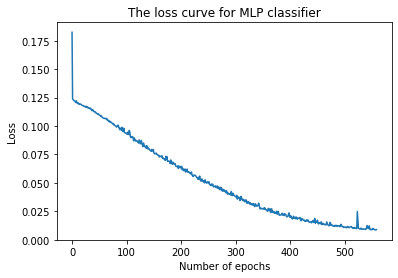

In [54]:
#02

t1=time.time()
final_model = MLPClassifier(activation='tanh', solver='adam', alpha=0.001, batch_size=64, 
                            max_iter=1000, hidden_layer_sizes=(18, 20), random_state=10, verbose=100)


# Training perceptron
t2=time.time()
final_model.fit(X_train, y_train.ravel())
t3=time.time()
y_pred = final_model.predict(X_test)
# Making predictions on validation data (int: 0, 1) with 0 as break point
t4=time.time()

#Loss curve
plt.plot(final_model.loss_curve_)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('The loss curve for MLP classifier')

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

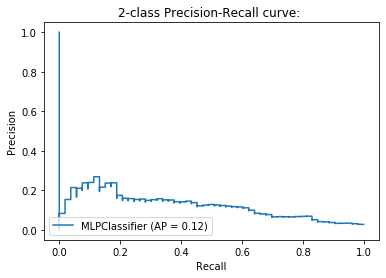

In [55]:
# Plot the Precision-Recall curve
PS = precision_score(y_test, y_pred, average='macro')
disp = plot_precision_recall_curve(final_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

## Classification Report

In [56]:
## Classification Report
# print("Validation accuracy: %.2f%% \n" % (results_kfold.mean()*100.0))

print("The number of iterations run: %f \n" %final_model.n_iter_)

print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Training set score: %f" % final_model.score(X_train, y_train))
print("Test set score: %f \n" % final_model.score(X_test, y_test))

print("F1 Score: %f \n" % f1_score(y_test, y_pred, average= 'macro'))

print(classification_report(y_test, y_pred), "\n")

print("Classification time:",str(t4-t2)," seconds")
print("Training time:",str(t3-t2)," seconds\n")
print("Testing time:",str(t4-t3)," seconds\n")

The number of iterations run: 559.000000 

Accuracy: 0.96
Training set score: 0.999786
Test set score: 0.962537 

F1 Score: 0.595670 

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1949
         1.0       0.24      0.19      0.21        53

    accuracy                           0.96      2002
   macro avg       0.61      0.59      0.60      2002
weighted avg       0.96      0.96      0.96      2002
 

Classification time: 25.893999814987183  seconds
Training time: 25.89099907875061  seconds

Testing time: 0.0030007362365722656  seconds



## Confusion Matrix

Confusion matrix (T3_P8)
[[1917   32]
 [  43   10]]


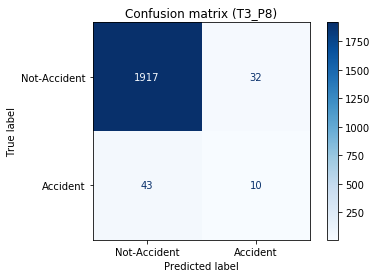

In [57]:
# Plot non-normalized confusion matrix
title = (f"Confusion matrix (T{t_size}_P{p_size})")
disp = plot_confusion_matrix(final_model, X_test, y_test, cmap=plt.cm.Blues,
                             display_labels= ('Not-Accident', 'Accident'),
                             sample_weight=None, normalize=None)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

## ROC Curve

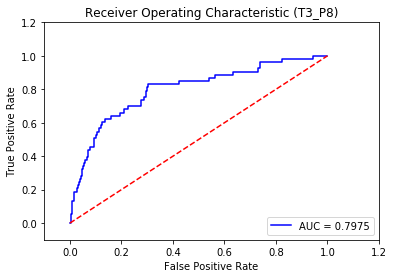

In [58]:
fpr3, tpr3, threshold = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr3, tpr3)
plt.title(f"Receiver Operating Characteristic (T{t_size}_P{p_size})")
plt.plot(fpr3, tpr3, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()